<a href="https://colab.research.google.com/github/sonjoy2074/Offensive_Language_Classification-/blob/main/model2_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Load**

In [ ]:
import pandas as pd

# Load training data
train_df = pd.read_csv('/content/drive/MyDrive/SMTECH_DATASET/train.csv')

# Load validation data
validation_df = pd.read_csv('/content/drive/MyDrive/SMTECH_DATASET/validation.csv')

# Load test data
test_df = pd.read_csv('/content/drive/MyDrive/SMTECH_DATASET/test.csv')

# Load test labels (for evaluation)
test_labels_df = pd.read_csv('/content/drive/MyDrive/SMTECH_DATASET/test_labels.csv')

**Dataset Overview**

In [ ]:
# Display basic information about the training dataset
print(train_df.info())
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23473 entries, 0 to 23472
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             23473 non-null  object
 1   feedback_text  23473 non-null  object
 2   toxic          23473 non-null  int64 
 3   abusive        23473 non-null  int64 
 4   vulgar         23473 non-null  int64 
 5   menace         23473 non-null  int64 
 6   offense        23473 non-null  int64 
 7   bigotry        23473 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ MB
None
                 id                                      feedback_text  toxic  \
0  281d77b7bebc2201  :::Sounds good.  Let me know when you're done ...      0   
1  716aac7bf3c63db1  "\nI say something, but it didn't actually con...      0   
2  57cb318c6edcf10c  "Agustina Barrientos]] \n | Modelo de Piñeiro ...      0   
3  dc3bd70118d91b3a  FYI I enjoy licking strangers scrotal sacks......      1   
4 

In [ ]:
# Check for missing values
print(train_df.isnull().sum())

id               0
feedback_text    0
toxic            0
abusive          0
vulgar           0
menace           0
offense          0
bigotry          0
dtype: int64


**Label Distribution**

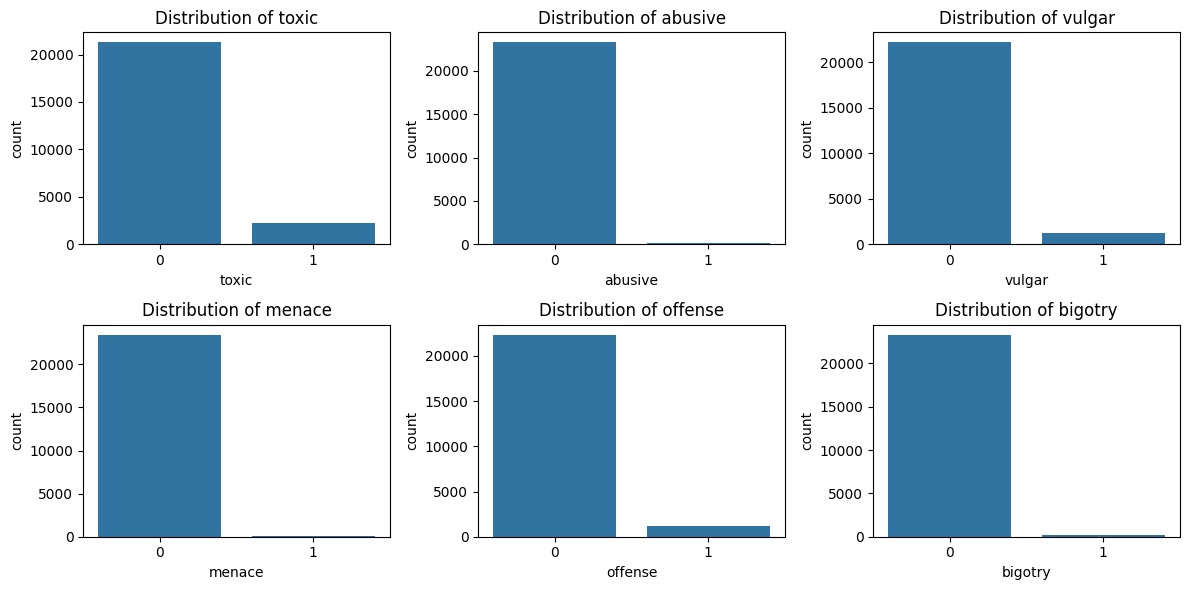

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot label distribution
labels = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']
plt.figure(figsize=(12, 6))
for i, label in enumerate(labels):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=train_df, x=label)
    plt.title(f'Distribution of {label}')
plt.tight_layout()
plt.show()

**Text Length Analysis**

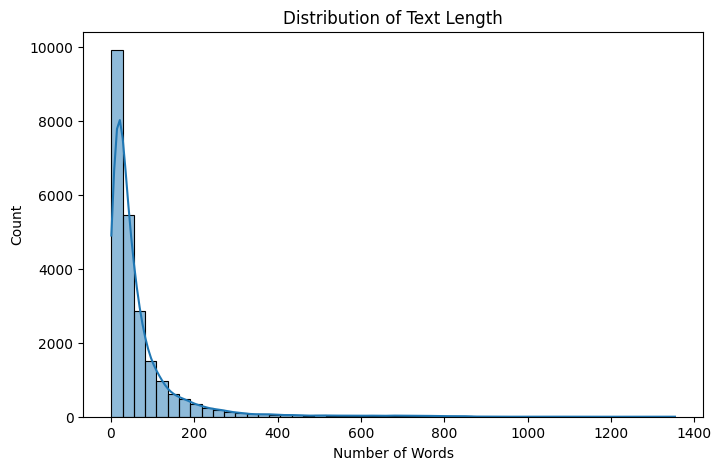

In [ ]:
# Add a column for text length
train_df['text_length'] = train_df['feedback_text'].apply(lambda x: len(x.split()))

# Plot text length distribution
plt.figure(figsize=(8, 5))
sns.histplot(train_df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


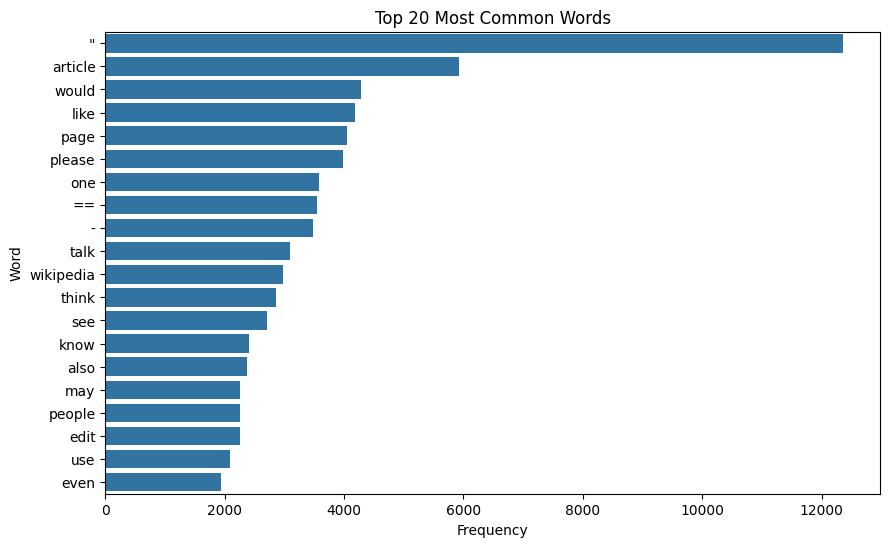

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Extract all words from feedback texts
all_words = ' '.join(train_df['feedback_text']).split()
filtered_words = [word.lower() for word in all_words if word.lower() not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Plot top N most common words
top_n = 20
most_common_words = word_counts.most_common(top_n)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title(f'Top {top_n} Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

**Step 2: Text Preprocessing**

In [ ]:
import nltk
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')
nltk.download('punkt')         # For tokenization
nltk.download('wordnet')       # For lemmatization
nltk.download('omw-1.4')       # WordNet data
nltk.download('stopwords')     # For stopword removal

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

**Text Prerocessing Function**

In [ ]:
#Tokenization
def tokenize(text):
    return word_tokenize(text)

#Convert lowercase
def lowercase(text):
    return text.lower()

#Remove stopwords and Punctuation
def remove_stopwords_and_punctuation(text):
    tokens = tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stop_words]
    tokens = [word for word in tokens if word not in string.punctuation]
    return ' '.join(tokens)

#Stemming/Lemmatization
def lemmatize(text):
    tokens = tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

def preprocess_text(text):
    text = lowercase(text)
    text = remove_stopwords_and_punctuation(text)
    text = lemmatize(text)
    return text


In [ ]:
print(train_df.columns)

Index(['id', 'feedback_text', 'toxic', 'abusive', 'vulgar', 'menace',
       'offense', 'bigotry', 'text_length'],
      dtype='object')


In [ ]:
# Apply preprocessing to training data
train_df['cleaned_text'] = train_df['feedback_text'].apply(preprocess_text)


**Data Split**

In [ ]:
from sklearn.model_selection import train_test_split
y = train_df[['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']]
# Train-val split
X_train, X_val, y_train, y_val = train_test_split(train_df['cleaned_text'], y, test_size=0.2, random_state=42)

**BERT MODEL**

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
# Load BERT tokenizer and model
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)
# Tokenize
def tokenize_for_bert(texts):
    return tokenizer_bert(
        list(texts),
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors='tf'
    )

X_train_bert = tokenize_for_bert(X_train)
X_val_bert = tokenize_for_bert(X_val)

# Compile and train
model_bert.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bert = model_bert.fit(
    X_train_bert['input_ids'], y_train,
    validation_data=(X_val_bert['input_ids'], y_val),
    epochs=5,
    batch_size=32
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
587/587 [==============================] - 538s 825ms/step - loss: 0.5552 - accuracy: 0.0122 - val_loss: 0.5476 - val_accuracy: 0.0000e+00
Epoch 2/5
587/587 [==============================] - 485s 827ms/step - loss: 0.5553 - accuracy: 2.6627e-04 - val_loss: 0.5476 - val_accuracy: 0.0000e+00
Epoch 3/5
587/587 [==============================] - 486s 829ms/step - loss: 0.5553 - accuracy: 2.1302e-04 - val_loss: 0.5476 - val_accuracy: 0.0000e+00
Epoch 4/5
587/587 [==============================] - 485s 826ms/step - loss: 0.5553 - accuracy: 1.5976e-04 - val_loss: 0.5476 - val_accuracy: 0.0000e+00
Epoch 5/5
587/587 [==============================] - 489s 833ms/step - loss: 0.5553 - accuracy: 3.1952e-04 - val_loss: 0.5476 - val_accuracy: 0.0000e+00


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, multilabel_confusion_matrix

# Get logits from model
logits = model_bert.predict(X_val_bert['input_ids']).logits

# Convert logits to probabilities
y_probs = tf.sigmoid(logits).numpy()

# Set threshold (e.g., 0.5) to convert probabilities to binary predictions
y_pred = (y_probs >= 0.5).astype(int)


147/147 [==============================] - 43s 261ms/step


In [ ]:
# Print precision, recall, F1-score for each label
print(classification_report(y_val, y_pred, target_names=['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']))

              precision    recall  f1-score   support

       toxic       0.00      0.00      0.00       431
     abusive       0.00      0.00      0.00        32
      vulgar       0.00      0.00      0.00       249
      menace       0.00      0.00      0.00        20
     offense       0.00      0.00      0.00       230
     bigotry       0.00      0.00      0.00        38

   micro avg       0.00      0.00      0.00      1000
   macro avg       0.00      0.00      0.00      1000
weighted avg       0.00      0.00      0.00      1000
 samples avg       0.00      0.00      0.00      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

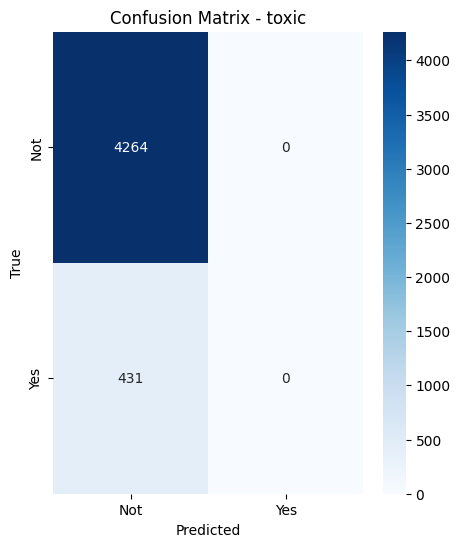

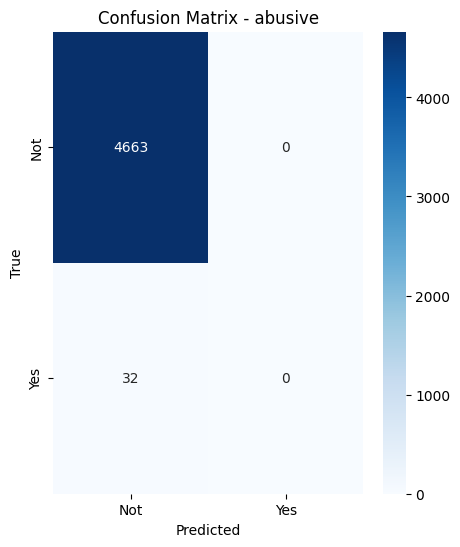

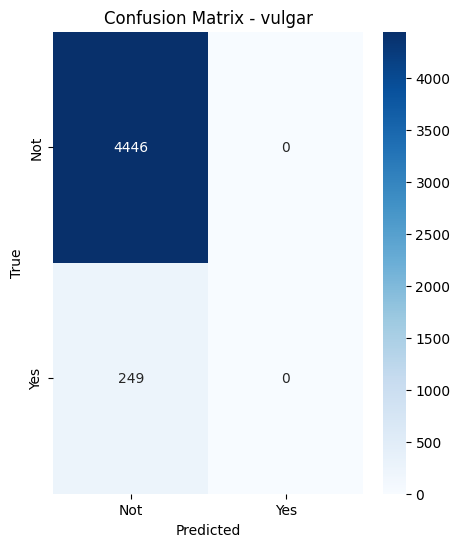

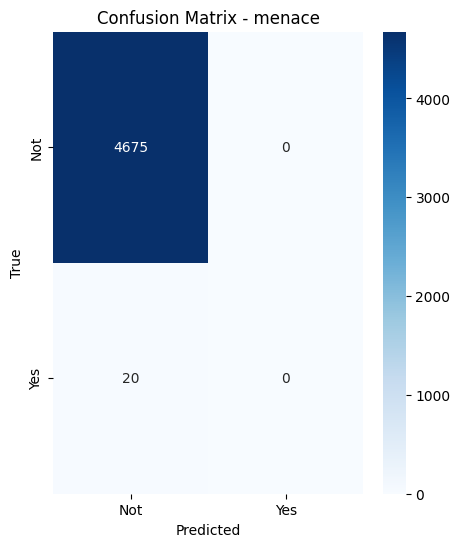

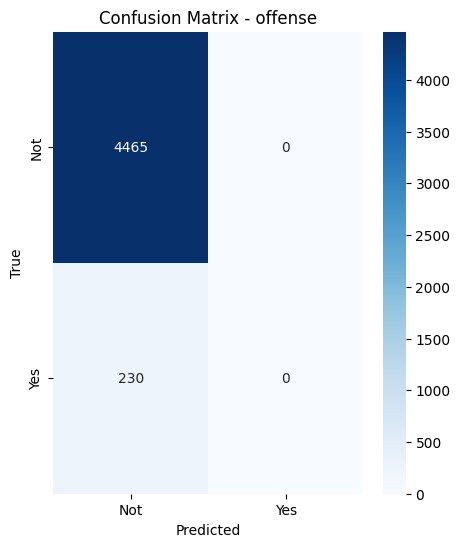

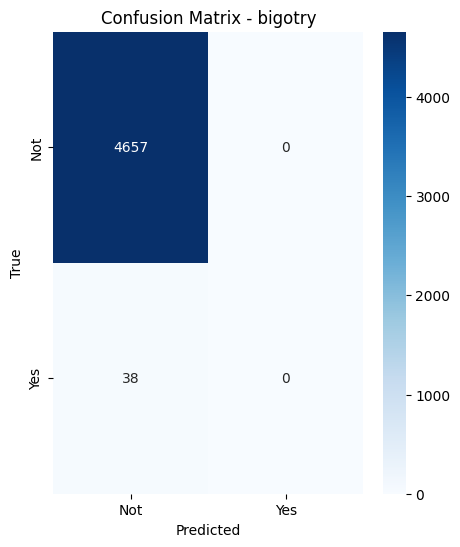

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrices
conf_matrices = multilabel_confusion_matrix(y_val, y_pred)

# Plot confusion matrix for each class
labels = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']
for i in range(6):
    plt.figure(figsize=(5, 6))
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap='Blues', xticklabels=['Not', 'Yes'], yticklabels=['Not', 'Yes'])
    plt.title(f'Confusion Matrix - {labels[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
